In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from metrics import *

In [3]:
def calculate_mean_std(results, cat):
    precision_list = [result[cat]["precision"] for result in results]
    recall_list = [result[cat]["recall"] for result in results]
    f1_list = [result[cat]["f1"] for result in results]
    support_list = [result[cat]["support"] for result in results]
    num_errors_list = [result[cat]["num_errors"] for result in results]

    mean_precision = sum(precision_list) / len(precision_list)
    mean_recall = sum(recall_list) / len(recall_list)
    mean_f1 = sum(f1_list) / len(f1_list)

    std_precision = (
        sum([(x - mean_precision) ** 2 for x in precision_list]) / len(precision_list)
    ) ** 0.5
    std_recall = (
        sum([(x - mean_recall) ** 2 for x in recall_list]) / len(recall_list)
    ) ** 0.5
    std_f1 = (sum([(x - mean_f1) ** 2 for x in f1_list]) / len(f1_list)) ** 0.5

    return {
        "mean_precision": round(mean_precision, 3),
        "mean_recall": round(mean_recall, 3),
        "mean_f1": round(mean_f1, 3),
        "std_precision": round(std_precision, 3),
        "std_recall": round(std_recall, 3),
        "std_f1": round(std_f1, 3),
        "sum_support": sum(support_list),
        "sum_num_errors": sum(num_errors_list),
        "raw_mean_precision": mean_precision,
        "raw_mean_recall": mean_recall,
        "raw_mean_f1": mean_f1,
    }


def output_tabular_performance(results, categories=["T1", "T2", "T3", "T4"]):
    precisions = []
    recalls = []
    f1s = []

    for category in categories:
        eval = calculate_mean_std(results, category)
        print(
            "{} {:.3f}({:.3f}) {:.3f}({:.3f}) {:.3f}({:.3f})".format(
                category,
                eval["mean_precision"],
                eval["std_precision"],
                eval["mean_recall"],
                eval["std_recall"],
                eval["mean_f1"],
                eval["std_f1"],
            )
        )

        # for calculating macro average
        precisions.append(eval["raw_mean_precision"])
        recalls.append(eval["raw_mean_recall"])
        f1s.append(eval["raw_mean_f1"])

    print(
        "MacroAvg. {:.3f} {:.3f} {:.3f}".format(
            round(sum(precisions) / len(precisions), 3),
            round(sum(recalls) / len(recalls), 3),
            round(sum(f1s) / len(f1s), 3),
        )
    )

In [4]:
t_run_list = [0, 1, 3, 6, 8]

# T Plot 

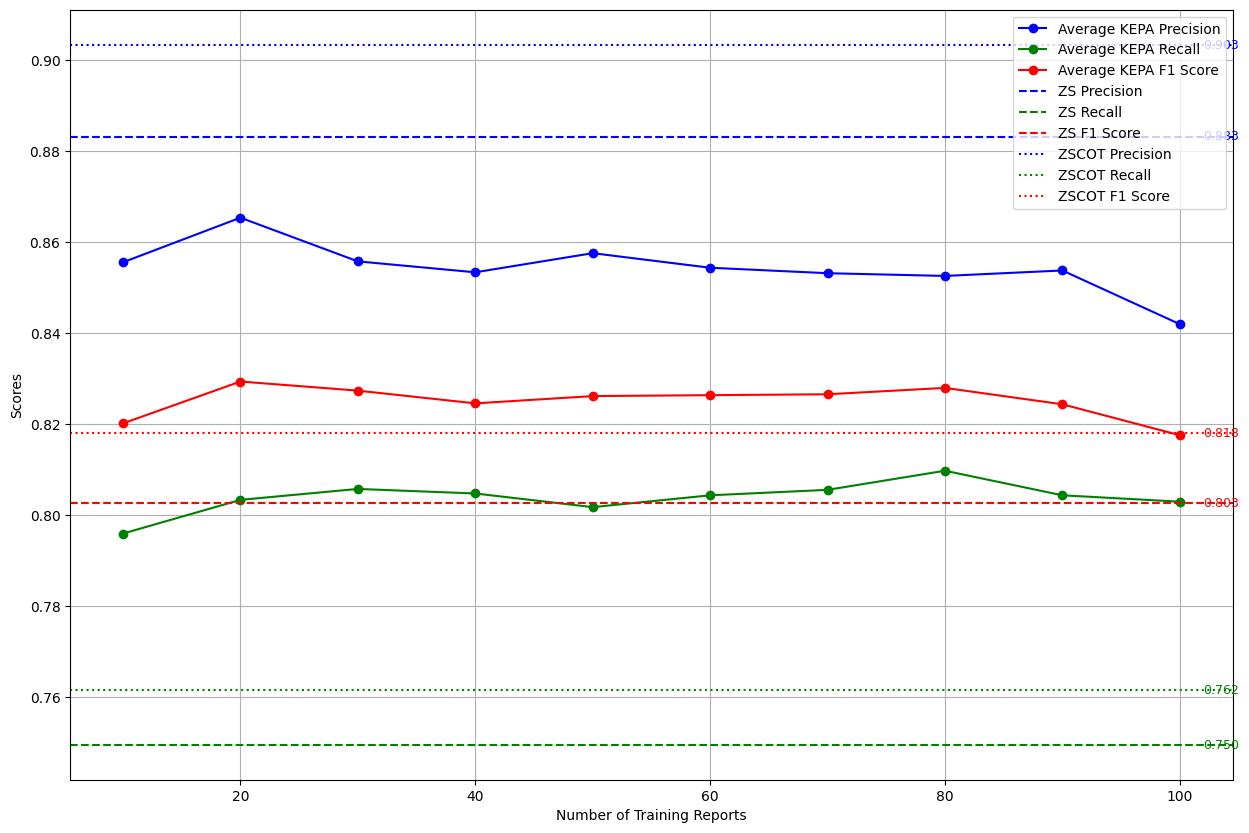

In [3]:
# Average (with new metric)

zs_t = pd.read_csv(
    "/home/yl3427/cylab/selfCorrectionAgent/result/0716_t14_zs_test_800.csv"
)
zscot_t = pd.read_csv(
    "/home/yl3427/cylab/selfCorrectionAgent/result/0716_t14_zscot_test_800.csv"
)
ensReas_t = pd.read_csv(
    "/secure/shared_data/rag_tnm_results/t14_results/mixtral_ensReas_step1/brca_t14_merged_df_800.csv"
)

zs_t_results = []
zscot_t_results = []
ensReas_t_results = []

topN = len(t_run_list)
total_run = 10
for run in range(total_run):
    split_ids = pd.read_csv(
        f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_test_{run}.csv"
    ).patient_filename
    zs_t_split = zs_t[zs_t.patient_filename.isin(split_ids)]
    zs_t_results.append(
        t14_calculate_metrics(zs_t_split["t"], zs_t_split["zs_t_ans_str"])["overall"]
    )

    zscot_t_split = zscot_t[zscot_t.patient_filename.isin(split_ids)]
    zscot_t_results.append(
        t14_calculate_metrics(zscot_t_split["t"], zscot_t_split["zs_t_ans_str"])[
            "overall"
        ]
    )

    ensReas_t_split = ensReas_t[ensReas_t.patient_filename.isin(split_ids)]
    ensReas_t_results.append(
        t14_calculate_metrics(ensReas_t_split["t"], ensReas_t_split["sc_ans"])[
            "overall"
        ]
    )

zs_t_sorted_results = sorted(zs_t_results, key=lambda x: x["macro_f1"], reverse=True)[
    :topN
]
zs_precision_avg = sum([rs["macro_precision"] for rs in zs_t_sorted_results]) / len(
    zs_t_sorted_results
)
zs_recall_avg = sum([rs["macro_recall"] for rs in zs_t_sorted_results]) / len(
    zs_t_sorted_results
)
zs_f1_avg = sum([rs["macro_f1"] for rs in zs_t_sorted_results]) / len(
    zs_t_sorted_results
)

zscot_t_sorted_results = sorted(
    zscot_t_results, key=lambda x: x["macro_f1"], reverse=True
)[:topN]
zscot_precision_avg = sum(
    [rs["macro_precision"] for rs in zscot_t_sorted_results]
) / len(zscot_t_sorted_results)
zscot_recall_avg = sum([rs["macro_recall"] for rs in zscot_t_sorted_results]) / len(
    zscot_t_sorted_results
)
zscot_f1_avg = sum([rs["macro_f1"] for rs in zscot_t_sorted_results]) / len(
    zscot_t_sorted_results
)

ensReas_t_sorted_results = sorted(
    ensReas_t_results, key=lambda x: x["macro_f1"], reverse=True
)[:topN]
ensReas_precision_avg = sum(
    [rs["macro_precision"] for rs in ensReas_t_sorted_results]
) / len(ensReas_t_sorted_results)
ensReas_recall_avg = sum([rs["macro_recall"] for rs in ensReas_t_sorted_results]) / len(
    ensReas_t_sorted_results
)
ensReas_f1_avg = sum([rs["macro_f1"] for rs in ensReas_t_sorted_results]) / len(
    ensReas_t_sorted_results
)

x_axis = np.array(range(1, 11)) * 10

memory_precision_cumulative = []
memory_recall_cumulative = []
memory_f1_cumulative = []

for run in t_run_list:
    test_df = pd.read_csv(
        f"/home/yl3427/cylab/selfCorrectionAgent/result/0718_t14_dynamic_test_{run}_outof_10runs.csv"
    )

    for i in np.array(range(1, 11)):  # memory (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
        result = t14_calculate_metrics(
            test_df["t"], test_df[f"cmem_t_{i*10}reports_ans_str"]
        )["overall"]
        if run == 0:
            memory_precision_cumulative.append(result["macro_precision"])
            memory_recall_cumulative.append(result["macro_recall"])
            memory_f1_cumulative.append(result["macro_f1"])
        else:
            memory_precision_cumulative[i - 1] += result["macro_precision"]
            memory_recall_cumulative[i - 1] += result["macro_recall"]
            memory_f1_cumulative[i - 1] += result["macro_f1"]


# average
precision_avg = [p / len(t_run_list) for p in memory_precision_cumulative]
recall_avg = [r / len(t_run_list) for r in memory_recall_cumulative]
f1_avg = [f / len(t_run_list) for f in memory_f1_cumulative]


plt.figure(figsize=(15, 10))

plt.plot(
    x_axis, precision_avg, label="Average KEPA Precision", color="blue", marker="o"
)
plt.plot(x_axis, recall_avg, label="Average KEPA Recall", color="green", marker="o")
plt.plot(x_axis, f1_avg, label="Average KEPA F1 Score", color="red", marker="o")


plt.axhline(y=zs_precision_avg, color="blue", linestyle="--", label="ZS Precision")
plt.axhline(y=zs_recall_avg, color="green", linestyle="--", label="ZS Recall")
plt.axhline(y=zs_f1_avg, color="red", linestyle="--", label="ZS F1 Score")

plt.axhline(y=zscot_precision_avg, color="blue", linestyle=":", label="ZSCOT Precision")
plt.axhline(y=zscot_recall_avg, color="green", linestyle=":", label="ZSCOT Recall")
plt.axhline(y=zscot_f1_avg, color="red", linestyle=":", label="ZSCOT F1 Score")

# plt.axhline(y=ensReas_precision_avg, color='blue', linestyle='-.', label='EnsReas Precision')
# plt.axhline(y=ensReas_recall_avg, color='green', linestyle='-.', label='EnsReas Recall')
# plt.axhline(y=ensReas_f1_avg, color='red', linestyle='-.', label='EnsReas F1 Score')

plt.text(
    x_axis[-1] + 2,
    zs_precision_avg,
    f"{zs_precision_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="blue",
)
plt.text(
    x_axis[-1] + 2,
    zs_recall_avg,
    f"{zs_recall_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="green",
)
plt.text(
    x_axis[-1] + 2,
    zs_f1_avg,
    f"{zs_f1_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="red",
)

plt.text(
    x_axis[-1] + 2,
    zscot_precision_avg,
    f"{zscot_precision_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="blue",
)
plt.text(
    x_axis[-1] + 2,
    zscot_recall_avg,
    f"{zscot_recall_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="green",
)
plt.text(
    x_axis[-1] + 2,
    zscot_f1_avg,
    f"{zscot_f1_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="red",
)

# plt.text(x_axis[-1] + 2, ensReas_precision_avg, f'{ensReas_precision_avg:.3f}', fontsize=9, ha='left', va='center', color='blue')
# plt.text(x_axis[-1] + 2, ensReas_recall_avg, f'{ensReas_recall_avg:.3f}', fontsize=9, ha='left', va='center', color='green')
# plt.text(x_axis[-1] + 2, ensReas_f1_avg, f'{ensReas_f1_avg:.3f}', fontsize=9, ha='left', va='center', color='red')

plt.xlabel("Number of Training Reports")
plt.ylabel("Scores")
# plt.title(f'The Average of 10 Results on 700 Test Reports (t14)')
plt.legend()
plt.grid(True)

plt.show()

# T Report

In [17]:
zs_t = pd.read_csv(
    "/home/yl3427/cylab/selfCorrectionAgent/result/0716_t14_zs_test_800.csv"
)
zscot_t = pd.read_csv(
    "/home/yl3427/cylab/selfCorrectionAgent/result/0716_t14_zscot_test_800.csv"
)

zs_t_results = []
zscot_t_results = []

for run in range(10):
    split_ids = pd.read_csv(
        f"/home/yl3427/cylab/selfCorrectionAgent/result/t14_test_{run}.csv"
    ).patient_filename
    zs_t_split = zs_t[zs_t.patient_filename.isin(split_ids)]
    zs_t_results.append(
        t14_calculate_metrics(zs_t_split["t"], zs_t_split["zs_t_ans_str"])
    )

    zscot_t_split = zscot_t[zscot_t.patient_filename.isin(split_ids)]
    zscot_t_results.append(
        t14_calculate_metrics(zscot_t_split["t"], zscot_t_split["zs_t_ans_str"])
    )

# select top 5 f1 from 10 splits
zs_t_sorted_results = sorted(
    zs_t_results, key=lambda x: x["overall"]["macro_f1"], reverse=True
)[:topN]
zscot_t_sorted_results = sorted(
    zscot_t_results, key=lambda x: x["overall"]["macro_f1"], reverse=True
)[:topN]

kepa_t_results = []
for run in t_run_list:
    test_df = pd.read_csv(
        f"/home/yl3427/cylab/selfCorrectionAgent/result/0718_t14_dynamic_test_{run}_outof_10runs.csv"
    )
    kepa_t_results.append(
        t14_calculate_metrics(test_df["t"], test_df["cmem_t_40reports_ans_str"])
    )

In [33]:
output_tabular_performance(zs_t_sorted_results)

T1 0.930(0.005) 0.694(0.011) 0.795(0.009)
T2 0.818(0.004) 0.965(0.003) 0.885(0.003)
T3 0.920(0.010) 0.697(0.009) 0.793(0.009)
T4 0.865(0.034) 0.642(0.019) 0.737(0.014)
MacroAvg. 0.883 0.749 0.802


In [34]:
output_tabular_performance(zscot_t_sorted_results)

T1 0.923(0.005) 0.733(0.014) 0.817(0.010)
T2 0.834(0.004) 0.972(0.002) 0.898(0.002)
T3 0.959(0.011) 0.705(0.010) 0.813(0.009)
T4 0.898(0.014) 0.637(0.024) 0.745(0.013)
MacroAvg. 0.903 0.762 0.818


In [32]:
output_tabular_performance(kepa_t_results)

T1 0.903(0.018) 0.820(0.039) 0.859(0.019)
T2 0.889(0.016) 0.936(0.015) 0.911(0.002)
T3 0.830(0.054) 0.825(0.037) 0.825(0.016)
T4 0.792(0.083) 0.638(0.045) 0.703(0.027)
MacroAvg. 0.853 0.805 0.824


In [35]:
n_run_list = [0, 1, 5, 6, 7]

# N Plot

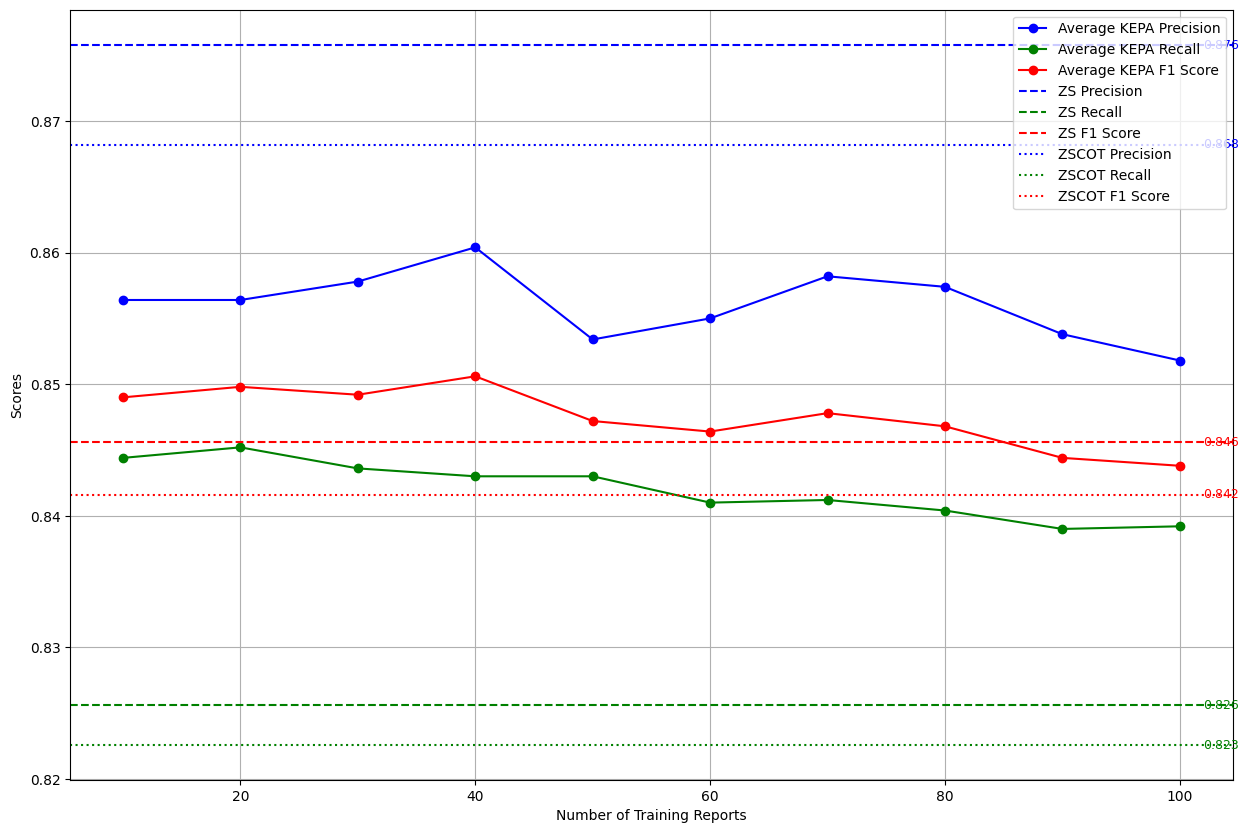

In [36]:
# Average (with new metric)

zs_n = pd.read_csv(
    "/home/yl3427/cylab/selfCorrectionAgent/result/0716_n03_zs_test_800.csv"
)
zscot_n = pd.read_csv(
    "/home/yl3427/cylab/selfCorrectionAgent/result/0716_n03_zscot_test_800.csv"
)
ensReas_n = pd.read_csv(
    "/secure/shared_data/rag_tnm_results/n03_results/mixtral_ensReas_step1/brca_n03_merged_df.csv"
)

zs_n_results = []
zscot_n_results = []
ensReas_n_results = []

topN = len(n_run_list)
total_run = 10
for run in range(total_run):

    split_ids = pd.read_csv(
        f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_test_{run}.csv"
    ).patient_filename
    zs_n_split = zs_n[zs_n.patient_filename.isin(split_ids)]
    zs_n_results.append(
        n03_calculate_metrics(zs_n_split["n"], zs_n_split["zs_n_ans_str"])["overall"]
    )

    zscot_n_split = zscot_n[zscot_n.patient_filename.isin(split_ids)]
    zscot_n_results.append(
        n03_calculate_metrics(zscot_n_split["n"], zscot_n_split["zs_n_ans_str"])[
            "overall"
        ]
    )

    ensReas_n_split = ensReas_n[ensReas_n.patient_filename.isin(split_ids)]
    ensReas_n_results.append(
        n03_calculate_metrics(ensReas_n_split["n"], ensReas_n_split["sc_ans"])[
            "overall"
        ]
    )

zs_n_sorted_results = sorted(zs_n_results, key=lambda x: x["macro_f1"], reverse=True)[
    :topN
]
zs_precision_avg = sum([rs["macro_precision"] for rs in zs_n_sorted_results]) / len(
    zs_n_sorted_results
)
zs_recall_avg = sum([rs["macro_recall"] for rs in zs_n_sorted_results]) / len(
    zs_n_sorted_results
)
zs_f1_avg = sum([rs["macro_f1"] for rs in zs_n_sorted_results]) / len(
    zs_n_sorted_results
)

zscot_n_sorted_results = sorted(
    zscot_n_results, key=lambda x: x["macro_f1"], reverse=True
)[:topN]
zscot_precision_avg = sum(
    [rs["macro_precision"] for rs in zscot_n_sorted_results]
) / len(zscot_n_sorted_results)
zscot_recall_avg = sum([rs["macro_recall"] for rs in zscot_n_sorted_results]) / len(
    zscot_n_sorted_results
)
zscot_f1_avg = sum([rs["macro_f1"] for rs in zscot_n_sorted_results]) / len(
    zscot_n_sorted_results
)

ensReas_n_sorted_results = sorted(
    ensReas_n_results, key=lambda x: x["macro_f1"], reverse=True
)[:topN]
ensReas_precision_avg = sum(
    [rs["macro_precision"] for rs in ensReas_n_sorted_results]
) / len(ensReas_n_sorted_results)
ensReas_recall_avg = sum([rs["macro_recall"] for rs in ensReas_n_sorted_results]) / len(
    ensReas_n_sorted_results
)
ensReas_f1_avg = sum([rs["macro_f1"] for rs in ensReas_n_sorted_results]) / len(
    ensReas_n_sorted_results
)


x_axis = np.array(range(1, 11)) * 10

memory_precision_cumulative = []
memory_recall_cumulative = []
memory_f1_cumulative = []
devided_by = 0
for run in n_run_list:

    test_df = pd.read_csv(
        f"/home/yl3427/cylab/selfCorrectionAgent/result/0718_n03_dynamic_test_{run}_outof_10runs.csv"
    )

    for i in np.array(range(1, 11)):  # memory (10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
        result = n03_calculate_metrics(
            test_df["n"], test_df[f"cmem_n_{i*10}reports_ans_str"]
        )["overall"]
        if run == 0:
            memory_precision_cumulative.append(result["macro_precision"])
            memory_recall_cumulative.append(result["macro_recall"])
            memory_f1_cumulative.append(result["macro_f1"])
        else:
            memory_precision_cumulative[i - 1] += result["macro_precision"]
            memory_recall_cumulative[i - 1] += result["macro_recall"]
            memory_f1_cumulative[i - 1] += result["macro_f1"]
    devided_by += 1


# average
precision_avg = [p / devided_by for p in memory_precision_cumulative]
recall_avg = [r / devided_by for r in memory_recall_cumulative]
f1_avg = [f / devided_by for f in memory_f1_cumulative]


plt.figure(figsize=(15, 10))

plt.plot(
    x_axis, precision_avg, label="Average KEPA Precision", color="blue", marker="o"
)
plt.plot(x_axis, recall_avg, label="Average KEPA Recall", color="green", marker="o")
plt.plot(x_axis, f1_avg, label="Average KEPA F1 Score", color="red", marker="o")


plt.axhline(y=zs_precision_avg, color="blue", linestyle="--", label="ZS Precision")
plt.axhline(y=zs_recall_avg, color="green", linestyle="--", label="ZS Recall")
plt.axhline(y=zs_f1_avg, color="red", linestyle="--", label="ZS F1 Score")

plt.axhline(y=zscot_precision_avg, color="blue", linestyle=":", label="ZSCOT Precision")
plt.axhline(y=zscot_recall_avg, color="green", linestyle=":", label="ZSCOT Recall")
plt.axhline(y=zscot_f1_avg, color="red", linestyle=":", label="ZSCOT F1 Score")

# plt.axhline(y=ensReas_precision_avg, color='blue', linestyle='-.', label='EnsReas Precision')
# plt.axhline(y=ensReas_recall_avg, color='green', linestyle='-.', label='EnsReas Recall')
# plt.axhline(y=ensReas_f1_avg, color='red', linestyle='-.', label='EnsReas F1 Score')

plt.text(
    x_axis[-1] + 2,
    zs_precision_avg,
    f"{zs_precision_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="blue",
)
plt.text(
    x_axis[-1] + 2,
    zs_recall_avg,
    f"{zs_recall_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="green",
)
plt.text(
    x_axis[-1] + 2,
    zs_f1_avg,
    f"{zs_f1_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="red",
)

plt.text(
    x_axis[-1] + 2,
    zscot_precision_avg,
    f"{zscot_precision_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="blue",
)
plt.text(
    x_axis[-1] + 2,
    zscot_recall_avg,
    f"{zscot_recall_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="green",
)
plt.text(
    x_axis[-1] + 2,
    zscot_f1_avg,
    f"{zscot_f1_avg:.3f}",
    fontsize=9,
    ha="left",
    va="center",
    color="red",
)

# plt.text(x_axis[-1] + 2, ensReas_precision_avg, f'{ensReas_precision_avg:.3f}', fontsize=9, ha='left', va='center', color='blue')
# plt.text(x_axis[-1] + 2, ensReas_recall_avg, f'{ensReas_recall_avg:.3f}', fontsize=9, ha='left', va='center', color='green')
# plt.text(x_axis[-1] + 2, ensReas_f1_avg, f'{ensReas_f1_avg:.3f}', fontsize=9, ha='left', va='center', color='red')

plt.xlabel("Number of Training Reports")
plt.ylabel("Scores")
# plt.title(f'The Average of 10 Results on 700 Test Reports (n03)')
plt.legend()
plt.grid(True)

plt.show()

# N Report

In [37]:
# n03
zs_n = pd.read_csv(
    "/home/yl3427/cylab/selfCorrectionAgent/result/0716_n03_zs_test_800.csv"
)
zscot_n = pd.read_csv(
    "/home/yl3427/cylab/selfCorrectionAgent/result/0716_n03_zscot_test_800.csv"
)

zs_n_results = []
zscot_n_results = []

for run in range(10):
    split_ids = pd.read_csv(
        f"/home/yl3427/cylab/selfCorrectionAgent/result/n03_test_{run}.csv"
    ).patient_filename
    zs_n_split = zs_n[zs_n.patient_filename.isin(split_ids)]
    zs_n_results.append(
        n03_calculate_metrics(zs_n_split["n"], zs_n_split["zs_n_ans_str"])
    )

    zscot_n_split = zscot_n[zscot_n.patient_filename.isin(split_ids)]
    zscot_n_results.append(
        n03_calculate_metrics(zscot_n_split["n"], zscot_n_split["zs_n_ans_str"])
    )

zs_n_sorted_results = sorted(
    zs_n_results, key=lambda x: x["overall"]["macro_f1"], reverse=True
)[:topN]
zscot_n_sorted_results = sorted(
    zscot_n_results, key=lambda x: x["overall"]["macro_f1"], reverse=True
)[:topN]

kepa_n_results = []
for run in n_run_list:
    test_df = pd.read_csv(
        f"/home/yl3427/cylab/selfCorrectionAgent/result/0718_n03_dynamic_test_{run}_outof_10runs.csv"
    )
    kepa_n_results.append(
        n03_calculate_metrics(test_df["n"], test_df["cmem_n_40reports_ans_str"])
    )

In [38]:
output_tabular_performance(zs_n_sorted_results, categories=["N0", "N1", "N2", "N3"])

N0 0.940(0.006) 0.962(0.003) 0.951(0.004)
N1 0.880(0.006) 0.894(0.005) 0.887(0.005)
N2 0.684(0.014) 0.712(0.010) 0.698(0.011)
N3 1.000(0.000) 0.734(0.013) 0.847(0.008)
MacroAvg. 0.876 0.826 0.846


In [39]:
output_tabular_performance(zscot_n_sorted_results, categories=["N0", "N1", "N2", "N3"])

N0 0.950(0.005) 0.959(0.005) 0.954(0.005)
N1 0.866(0.007) 0.896(0.005) 0.880(0.005)
N2 0.673(0.016) 0.684(0.014) 0.679(0.014)
N3 0.984(0.008) 0.752(0.014) 0.852(0.011)
MacroAvg. 0.868 0.823 0.841


In [40]:
output_tabular_performance(kepa_n_results, categories=["N0", "N1", "N2", "N3"])

N0 0.948(0.008) 0.954(0.015) 0.951(0.010)
N1 0.883(0.016) 0.889(0.007) 0.886(0.006)
N2 0.723(0.020) 0.748(0.043) 0.734(0.023)
N3 0.890(0.042) 0.782(0.032) 0.831(0.016)
MacroAvg. 0.861 0.843 0.850
